In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

/Users/lex/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


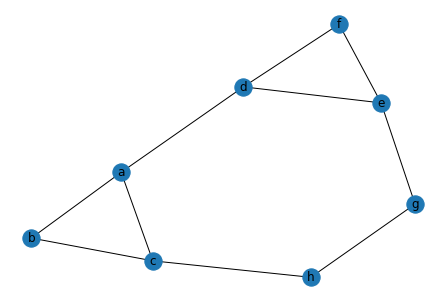

In [2]:
H = nx.Graph()
H.add_nodes_from(['a','b', 'c', 'd', 'e', 'f', 'g', 'h'])
edg = [
    ('a','b'), ('b','c'), ('c','a'), ('a','d'), ('d','e'), ('e', 'f'), ('f','d'), ('e','g'), ('g','h'), ('h','c')
]

for e in edg:
    H.add_edge(*e)


nx.draw(H, with_labels=1)

A clique cover of a graph G may be seen as a graph coloring of the complement graph of G, the graph on the same vertex set that has edges between non-adjacent vertices of G. 

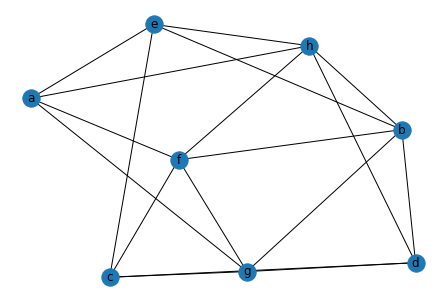

In [35]:
comp_H = nx.complement(H)
nx.draw(comp_H, with_labels=1)

greedy_colouring_output_dic = nx.greedy_color(comp_H, strategy='largest_first', interchange=False)
unique_colours = set(greedy_colouring_output_dic.values())

In [37]:
colour_key_for_nodes = {}
for colour in unique_colours:
    colour_key_for_nodes[colour] = [k for k in greedy_colouring_output_dic.keys()
                                        if greedy_colouring_output_dic[k] == colour]
colour_key_for_nodes

{0: ['b', 'a', 'c'], 1: ['f', 'd', 'e'], 2: ['g', 'h']}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


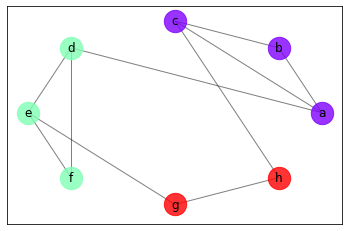

In [54]:
import matplotlib.cm as cm

plt.figure()
colour_list = cm.rainbow(np.linspace(0, 1, len(colour_key_for_nodes)))
pos = nx.circular_layout(H)

for colour in colour_key_for_nodes:
    nx.draw_networkx_nodes(H, pos,
                           nodelist=[node for node in colour_key_for_nodes[colour]],
                           node_color=colour_list[colour],
                           node_size=500,
                           alpha=0.8
                           )
labels = {node: node for node in list(H.nodes)}
nx.draw_networkx_labels(H, pos, labels)  # , font_size=8)

nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.5)
plt.show()

In [46]:
colour_key_for_nodes[0]

['b', 'a', 'c']